# Assignment 5: Exploratory Data Analysis and Hypothesis Testing

**Student:** Zhijia Yang
**Dataset:**  Online Shoppers 
**Date:** Oct 6,2025

## Objective
Perform exploratory data analysis (EDA) and hypothesis testing on your chosen dataset. Identify patterns and test meaningful hypotheses about relationships between variables.

---


## 1. Import Data and Libraries

Import the necessary libraries and load your dataset.


In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set up plotting
plt.style.use('default')
sns.set_palette("husl")

print("Libraries imported successfully!")


Matplotlib is building the font cache; this may take a moment.


Libraries imported successfully!


In [4]:
# Load your dataset here
# Replace this with your actual data loading code
# Example for Heart Disease dataset:
df = pd.read_csv('online_shoppers_intention.csv')

# For this template, I'll create a simple example dataset
np.random.seed(42)
n = 200

# Create sample data (replace with your actual dataset)
data = {
    'Administrative': df['Administrative'].values,
    'Informational': df['Informational'].values,
    'ProductRelated': df['ProductRelated'].values,
    'BounceRates': df['BounceRates'].values,
    'ExitRates': df['ExitRates'].values,
    'PageValues': df['PageValues'].values,
    'SpecialDay': df['SpecialDay'].values,
    'Month': df['Month'].values,
    'OperatingSystems': df['OperatingSystems'].values,
    'Browser': df['Browser'].values,
    'Region': df['Region'].values,
    'TrafficType': df['TrafficType'].values,
    'VisitorType': df['VisitorType'].values,
    'Weekend': df['Weekend'].values,
    'Revenue': df['Revenue'].values
}

df = pd.DataFrame(data)
print(f"Dataset shape: {df.shape}")
df.head()


Dataset shape: (12330, 15)


,Administrative,Informational,ProductRelated,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0,1,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0,2,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0,1,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0,2,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0,10,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


## 2. Exploratory Data Analysis (EDA)

Explore your dataset to understand its structure and identify patterns.


In [5]:
# Basic dataset information
print("=== DATASET OVERVIEW ===")
print(f"Shape: {df.shape}")
print(f"\nData types:")
print(df.dtypes)
print(f"\nMissing values:")
print(df.isnull().sum())
print(f"\nBasic statistics:")
df.describe()


=== DATASET OVERVIEW ===
Shape: (12330, 15)

Data types:
Administrative        int64
Informational         int64
ProductRelated        int64
BounceRates         float64
ExitRates           float64
PageValues          float64
SpecialDay          float64
Month                object
OperatingSystems      int64
Browser               int64
Region                int64
TrafficType           int64
VisitorType          object
Weekend                bool
Revenue                bool
dtype: object

Missing values:
Administrative      0
Informational       0
ProductRelated      0
BounceRates         0
ExitRates           0
PageValues          0
SpecialDay          0
Month               0
OperatingSystems    0
Browser             0
Region              0
TrafficType         0
VisitorType         0
Weekend             0
Revenue             0
dtype: int64

Basic statistics:


,Administrative,Informational,ProductRelated,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,0.503569,31.731468,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,1.270156,44.475503,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,7.000000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,0.000000,18.000000,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,0.000000,38.000000,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,24.000000,705.000000,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


=== TARGET VARIABLE ===
Target distribution:
Revenue
False    10422
True      1908
Name: count, dtype: int64


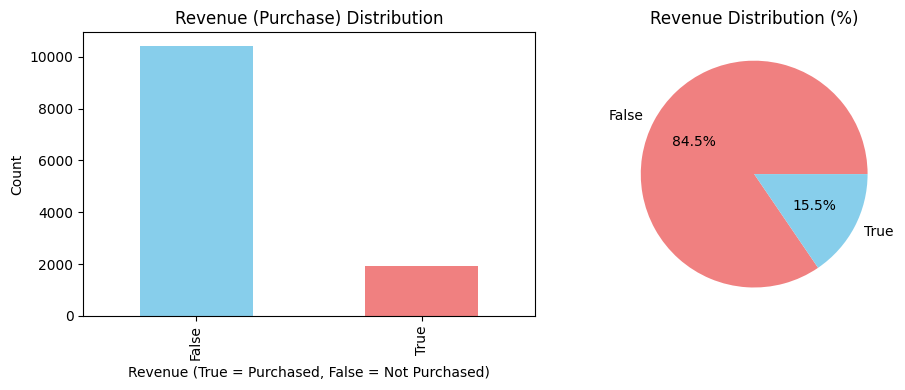

In [7]:
# === Target variable analysis ===
print("=== TARGET VARIABLE ===")
target_counts = df['Revenue'].value_counts()   
print("Target distribution:")
print(target_counts)

# === Visualize target distribution ===
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
target_counts.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Revenue (Purchase) Distribution')
plt.xlabel('Revenue (True = Purchased, False = Not Purchased)')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
plt.pie(target_counts.values,
        labels=target_counts.index,
        autopct='%1.1f%%',
        colors=['lightcoral', 'skyblue'])
plt.title('Revenue Distribution (%)')

plt.tight_layout()
plt.show()

=== NUMERICAL VARIABLES ===
Numerical columns: ['Administrative', 'Informational', 'ProductRelated', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType']


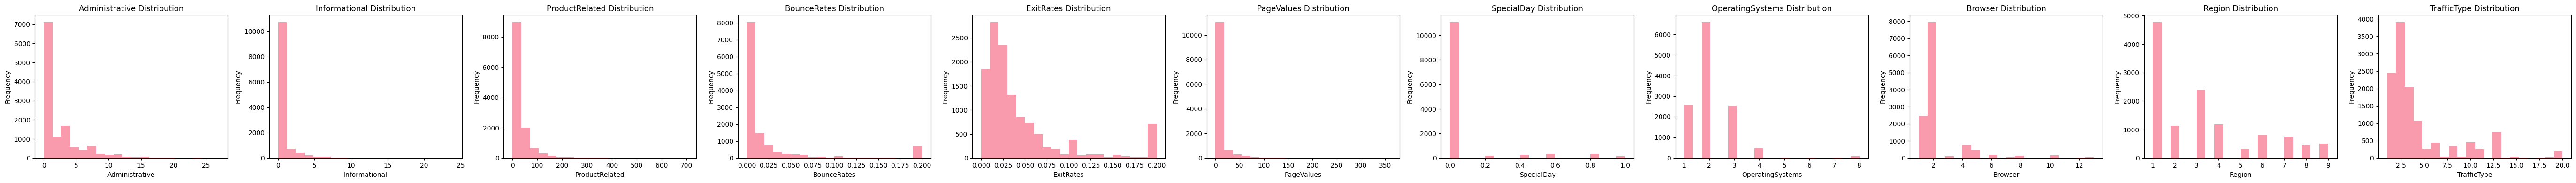

In [8]:
# Numerical variables analysis
print("=== NUMERICAL VARIABLES ===")
numerical_cols = df.select_dtypes(include=[np.number]).columns
print(f"Numerical columns: {list(numerical_cols)}")

# Create histograms for numerical variables
fig, axes = plt.subplots(1, len(numerical_cols), figsize=(5*len(numerical_cols), 4))
if len(numerical_cols) == 1:
    axes = [axes]

for i, col in enumerate(numerical_cols):
    axes[i].hist(df[col], bins=20, alpha=0.7)
    axes[i].set_title(f'{col} Distribution')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


=== CATEGORICAL VARIABLES ===
Categorical columns: ['Month', 'VisitorType']

Month value counts:
Month
May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: count, dtype: int64


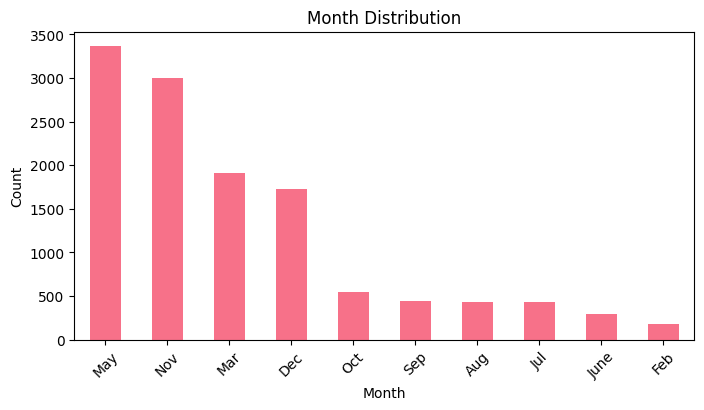


VisitorType value counts:
VisitorType
Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: count, dtype: int64


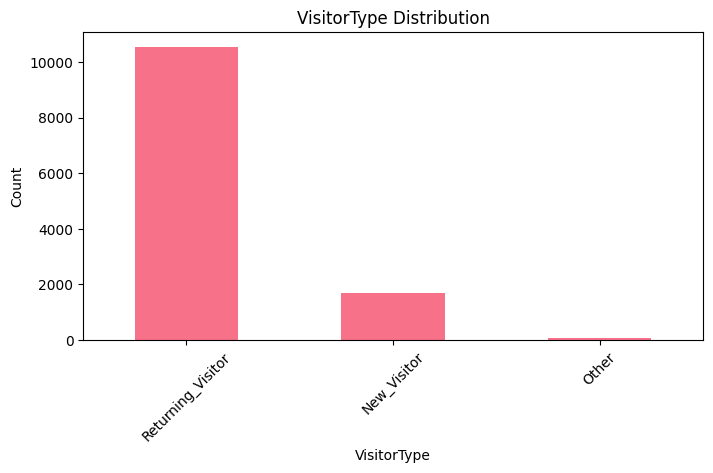

In [9]:
# Categorical variables analysis
print("=== CATEGORICAL VARIABLES ===")
categorical_cols = df.select_dtypes(include=['object']).columns
print(f"Categorical columns: {list(categorical_cols)}")

for col in categorical_cols:
    print(f"\n{col} value counts:")
    print(df[col].value_counts())
    
    # Create bar plot
    plt.figure(figsize=(8, 4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


=== CORRELATION ANALYSIS ===


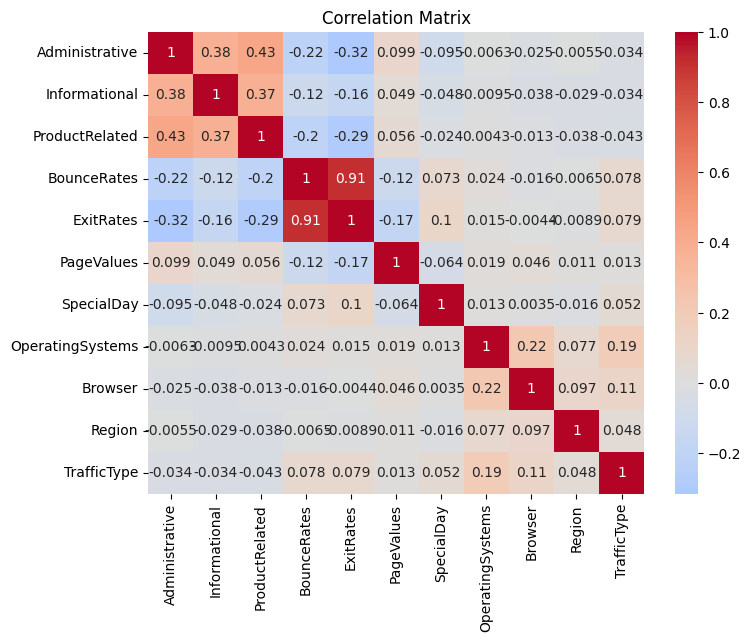

In [11]:
# Correlation analysis
print("=== CORRELATION ANALYSIS ===")
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

# Show correlations with target variable
if 'target' in df.columns:
    target_correlations = correlation_matrix['target'].sort_values(ascending=False)
    print("\nCorrelations with target variable:")
    print(target_correlations)


=== RELATIONSHIPS WITH TARGET ===


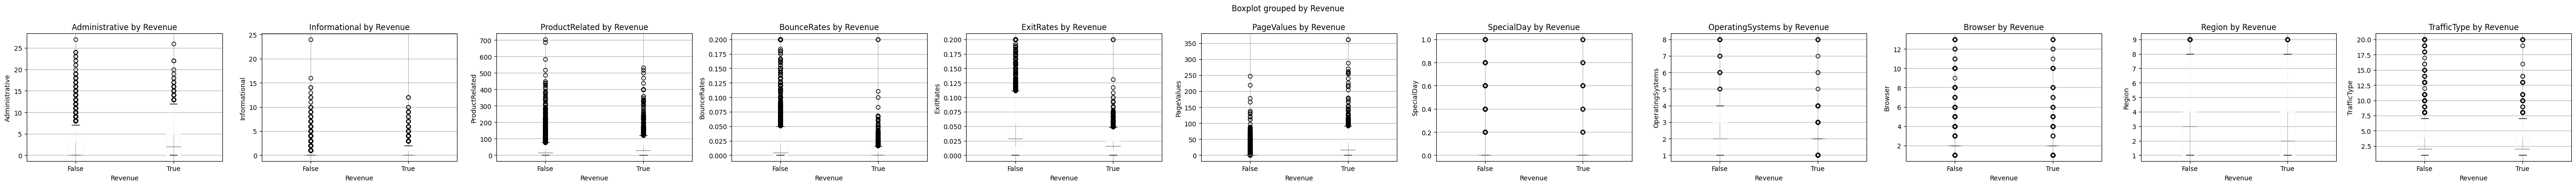


Month vs Revenue:
Revenue  False  True 
Month                
Aug      0.824  0.176
Dec      0.875  0.125
Feb      0.984  0.016
Jul      0.847  0.153
June     0.899  0.101
Mar      0.899  0.101
May      0.891  0.109
Nov      0.746  0.254
Oct      0.791  0.209
Sep      0.808  0.192

VisitorType vs Revenue:
Revenue            False  True 
VisitorType                    
New_Visitor        0.751  0.249
Other              0.812  0.188
Returning_Visitor  0.861  0.139


In [13]:
# Relationship between variables and target
print("=== RELATIONSHIPS WITH TARGET ===")

# Box plots for numerical variables vs target
# Box plots for numerical variables vs Revenue
numerical_cols_no_target = [col for col in numerical_cols if col != 'Revenue']

if len(numerical_cols_no_target) > 0:
    fig, axes = plt.subplots(1, len(numerical_cols_no_target), figsize=(5*len(numerical_cols_no_target), 4))
    if len(numerical_cols_no_target) == 1:
        axes = [axes]
    
    for i, col in enumerate(numerical_cols_no_target):
        df.boxplot(column=col, by='Revenue', ax=axes[i])
        axes[i].set_title(f'{col} by Revenue')
        axes[i].set_xlabel('Revenue')
        axes[i].set_ylabel(col)
    
    plt.tight_layout()
    plt.show()

# Crosstabs for categorical variables vs Revenue
for col in categorical_cols:
    print(f"\n{col} vs Revenue:")
    crosstab = pd.crosstab(df[col], df['Revenue'], normalize='index')
    print(crosstab.round(3))


## 3. Hypothesis Formulation

Based on your EDA, formulate **2-3 testable hypotheses**. Each hypothesis should be:
- Clear and specific
- Testable with statistical methods
- Grounded in your observations

### Hypothesis 1: Purchasing behavior usually related to visitor's type.
**H1:** Purchasing behavior usually related to visitor's type
- **Null Hypothesis (H0):** Conversion rate isn't related with visitors' type.
- **Alternative Hypothesis (H1):** Conversion rate is related with visitors' type.
- **Rationale:** Returning visitors are familiar and trust the brand. Therefore, they are more likely to make a purchase.

### Hypothesis 2: customers who come during weekend are more likely to make a purchase than during the weekdays.
**H2:** customers who come during weekend are more likely to make a purchase than during the weekdays.
- **Null Hypothesis (H0):** customers who come during weekdays are more likely to make a purchase, comparing with customers who come during weekend.
- **Alternative Hypothesis (H1):**customers who come during weekend are more likely to make a purchase, comparing with customers who come during weekdays.
- **Rationale:** Weekends time are more flexible and adequate for customers to make a purchase decision.

### Hypothesis 3: Visitors who spend more time on online shopping products pages are more likely to make a purchase.
**H3:** Visitors who spend more time on online shopping products pages are more likely to make a purchase.
- **Null Hypothesis (H0):** customers with low ProductRelated_Duration more likely to make a purchase decision.
- **Alternative Hypothesis (H1):** customers with high ProductRelated_Duration more likely to make a purchase decision.
- **Rationale:** People always see the products they want for a long time.

---


## 4. Hypothesis Testing

Test each hypothesis using appropriate statistical methods. For each test, explain:
- Why you chose this test
- The results and interpretation
- Whether you reject or fail to reject the null hypothesis


### Testing Hypothesis 1: Purchasing behavior usually related to visitor's type.

**Test Choice:** chi-square
- **Why appropriate:** We only have to find out whether there's a relationship between two visitor type and revenue. THerefore, chi-square is appropriate.

In [ ]:
# Hypothesis 1 Testing
print("=== TESTING HYPOTHESIS 1: Visitor Type and Purchase Likelihood ===")

import pandas as pd
from scipy import stats

df = pd.read_csv("online_shoppers_intention.csv")

contingency_table = pd.crosstab(df['VisitorType'], df['Revenue'])

chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-square Statistic:", chi2)
print("p-value:", p)

if p < 0.05:
    print("Reject H0: Visitor type and purchase likelihood are significantly related.")
else:
    print("Fail to reject H0: No significant relationship between visitor type and purchase likelihood.")


print("Conversion rate is related with visitors' type")


=== TESTING HYPOTHESIS 1: Visitor Type and Purchase Likelihood ===
Chi-square Statistic: 135.2519228192047
p-value: 4.269904152293867e-30
Reject H0: Visitor type and purchase likelihood are significantly related.
nononono
Conversion rate is related with visitors' type


### Testing Hypothesis 2: customers who come during weekend are more likely to make a purchase than during the weekdays.

**Test Choice:** Two-proportion z-test
- **Why appropriate:** We have to compare the percentage of customers who made a purchase between weekend and weekday visitors. Since we are comparing two independent proportions and both variables are categorical, z-test is appropriate.

In [25]:
# Hypothesis 2 Testing
print("=== TESTING HYPOTHESIS 2: Weekend vs Weekday Purchases ===")

import pandas as pd
from scipy import stats
import math

df = pd.read_csv("online_shoppers_intention.csv")

df["Weekend"] = df["Weekend"].astype(bool)

weekend_success = df[(df["Weekend"]==True) & (df["Revenue"]==True)].shape[0]
weekend_total   = df[df["Weekend"]==True].shape[0]
weekday_success = df[(df["Weekend"]==False) & (df["Revenue"]==True)].shape[0]
weekday_total   = df[df["Weekend"]==False].shape[0]

p_weekend = weekend_success / weekend_total
p_weekday = weekday_success / weekday_total
p_pool = (weekend_success + weekday_success) / (weekend_total + weekday_total)
se = math.sqrt(p_pool * (1 - p_pool) * (1/weekend_total + 1/weekday_total))

z_stat = (p_weekend - p_weekday) / se
p_value = 1 - stats.norm.cdf(z_stat)

print(f"Weekend conversion rate: {p_weekend:.4f}")
print(f"Weekday conversion rate: {p_weekday:.4f}")
print(f"Z-statistic: {z_stat:.3f}")
print(f"p-value: {p_value:.5f}")

if p_value < 0.05 and p_weekend > p_weekday:
    print("Reject H₀: Weekend visitors are significantly more likely to make a purchase.")
elif p_value < 0.05 and p_weekend < p_weekday:
    print("Reject H₀, but weekday visitors actually have a higher purchase rate.")
else:
    print("Fail to reject H₀: No significant difference in purchase rate between weekend and weekday.")

# 7. Output sample sizes for reference
print("\nSample sizes:")
print(f"Weekend visitors: {weekend_total}")
print(f"Weekday visitors: {weekday_total}")



=== TESTING HYPOTHESIS 2: Weekend vs Weekday Purchases ===
Weekend conversion rate: 0.1740
Weekday conversion rate: 0.1489
Z-statistic: 3.253
p-value: 0.00057
Reject H₀: Weekend visitors are significantly more likely to make a purchase.

Sample sizes:
Weekend visitors: 2868
Weekday visitors: 9462


### Testing Hypothesis 3: Visitors who spend more time on online shopping products pages are more likely to make a purchase.

**Test Choice:** t-test
- **Why appropriate:** We have to compare two independent groups, the ProductRelated_Duration and Revenue. t-test is suitable for comparing the mean and determining whether purchase sessions have a higher mean duration than non-purchase sessions.


In [28]:
# Hypothesis 3 Testing (if applicable)

print("=== TESTING HYPOTHESIS 3: Product-Related Duration and Purchase Likelihood ===")

import pandas as pd
from scipy import stats

df = pd.read_csv("online_shoppers_intention.csv")

purchase = df[df["Revenue"] == True]["ProductRelated_Duration"]
no_purchase = df[df["Revenue"] == False]["ProductRelated_Duration"]
t_stat, p_value_two_tailed = stats.ttest_ind(purchase, no_purchase, equal_var=False)
p_value = p_value_two_tailed / 2   

print(f"t-statistic: {t_stat:.3f}")
print(f"p-value (one-tailed): {p_value:.5f}")

if (t_stat > 0) and (p_value < 0.05):
    print("Reject H₀: Visitors who spend more time on product pages are significantly more likely to purchase.")
else:
    print("Fail to reject H₀: No significant evidence that longer viewing time leads to more purchases.")

print("\nAverage ProductRelated_Duration:")
print(f"Purchased (Revenue=True):  {purchase.mean():.2f} seconds")
print(f"Not Purchased (Revenue=False):  {no_purchase.mean():.2f} seconds")

=== TESTING HYPOTHESIS 3: Product-Related Duration and Purchase Likelihood ===
t-statistic: 14.447
p-value (one-tailed): 0.00000
Reject H₀: Visitors who spend more time on product pages are significantly more likely to purchase.

Average ProductRelated_Duration:
Purchased (Revenue=True):  1876.21 seconds
Not Purchased (Revenue=False):  1069.99 seconds


## 5. Summary and Conclusions

### Key Findings from EDA:
1. Most visitors are Returning Visitors, while New Visitors make up a small portion of the dataset. Although the result shows that there is a relationship between visitors type and purchasing behaviors we still have to get more data for new visitors's purchasing behaviors.
2. customers who come during weekend are more likely to make a purchase than during the weekdays. However, the conversion rate of weekend customers is slightly greater than weekdays customers.
3. Visitors who spend more time on online shopping products pages are more likely to make a purchase.

### Hypothesis Testing Results:

| Hypothesis | Test Used | p-value | Result | Interpretation |
|------------|-----------|---------|--------|-----------------|
| **H1** | Chi-Square Test | 4.269904152293867e-30 | [Significant] | There is a statistically significant relationship between visitor type and purchasing behavior. |
| **H2** | Two-Proportion z-Test | 0.00057 | [Significant] |  customers who come during weekend are more likely to make a purchase than during the weekdays. However, the conversion rate of weekend customers is slightly greater than weekdays customers.|
| **H3** | t-Test| 0.00000 | [Significant] | There is a statistical evidence shows that visitors who spend more time on online shopping products pages are more likely to make a purchase. |

### Key Insights:
- visitors type will affect purchasing experience. Due to the large number of Returning visitors, it's better for store to maintain a good relationship with their past visitors.
- More customers will shop during weekend and their conversion is slightly greater than weekdays visitors.
- Time spent on product pages is a strong indicator of buying intent, so that targeting users with high engagement could improve conversion rates.
-Practical implimentation: Focusing on weekend returning visitors and track page engagement time.
-limitation:The dataset include more returning visitors and weekend visitors; less new visitors and weekdays visitors. Therefore, the result's reliability may change if there are more data about new visitors and weekdays visitors.
### Future Research:
- [What additional analysis could be done? Perform correlation to identify which browsing behaviors most strongly influence purchasing decisions.]
- [What other variables might be important?location of the store and whether shopping at special sale days]

---

**Note:** Remember to replace the sample data with your actual dataset and fill in all the template sections with your own analysis and interpretations.


In [29]:
# Final summary
print("=== ANALYSIS COMPLETE ===")
print(f"Dataset analyzed: [online_shoppers_intention.csv]")
print(f"Sample size: {len(df)} observations")
print(f"Number of features: {df.shape[1]-1} (excluding target)")
print(f"\nAnalysis completed successfully!")
print("\nRemember to:")
print("1. Replace sample data with your actual dataset")
print("2. Fill in all template sections with your analysis")
print("3. Provide clear explanations for your choices")
print("4. Interpret your results meaningfully")


=== ANALYSIS COMPLETE ===
Dataset analyzed: [online_shoppers_intention.csv]
Sample size: 12330 observations
Number of features: 17 (excluding target)

Analysis completed successfully!

Remember to:
1. Replace sample data with your actual dataset
2. Fill in all template sections with your analysis
3. Provide clear explanations for your choices
4. Interpret your results meaningfully
